In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
data = pd.read_csv('C:\\Users\\dtulomba\\Documents\\ProjetsCours\\Projet2\\fr.openfoodfacts.org.products.csv', sep='\t')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [183]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [185]:
data.shape

(320772, 162)

In [186]:
data.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

### Nous avons séléctionné des variables qui sont importantes pour nous et avec lesquels nous allons continuer tout au long de notre étude 

In [187]:
list_new_dataframe = ['code','pnns_groups_2', 'pnns_groups_1', 'nutrition_grade_fr', 'product_name' ]

new_dataframe = data.loc[:,list_new_dataframe]
new_dataframe

,code,pnns_groups_2,pnns_groups_1,nutrition_grade_fr,product_name
0,3087,NaN,NaN,NaN,Farine de blé noir
1,4530,NaN,NaN,d,Banana Chips Sweetened (Whole)
2,4559,NaN,NaN,b,Peanuts
3,16087,NaN,NaN,d,Organic Salted Nut Mix
4,16094,NaN,NaN,NaN,Organic Polenta
...,...,...,...,...,...
320767,9948282780603,NaN,NaN,NaN,Tomato & ricotta
320768,99567453,NaN,NaN,b,"Mint Melange Tea A Blend Of Peppermint, Lemon ..."
320769,9970229501521,Appetizers,Salty snacks,NaN,乐吧泡菜味薯片
320770,9980282863788,NaN,NaN,NaN,Tomates aux Vermicelles


### Selection des autres variables en utilisant le taux de completude 

In [188]:
complitude_rate_first=data.notnull().sum()/data.shape[0]

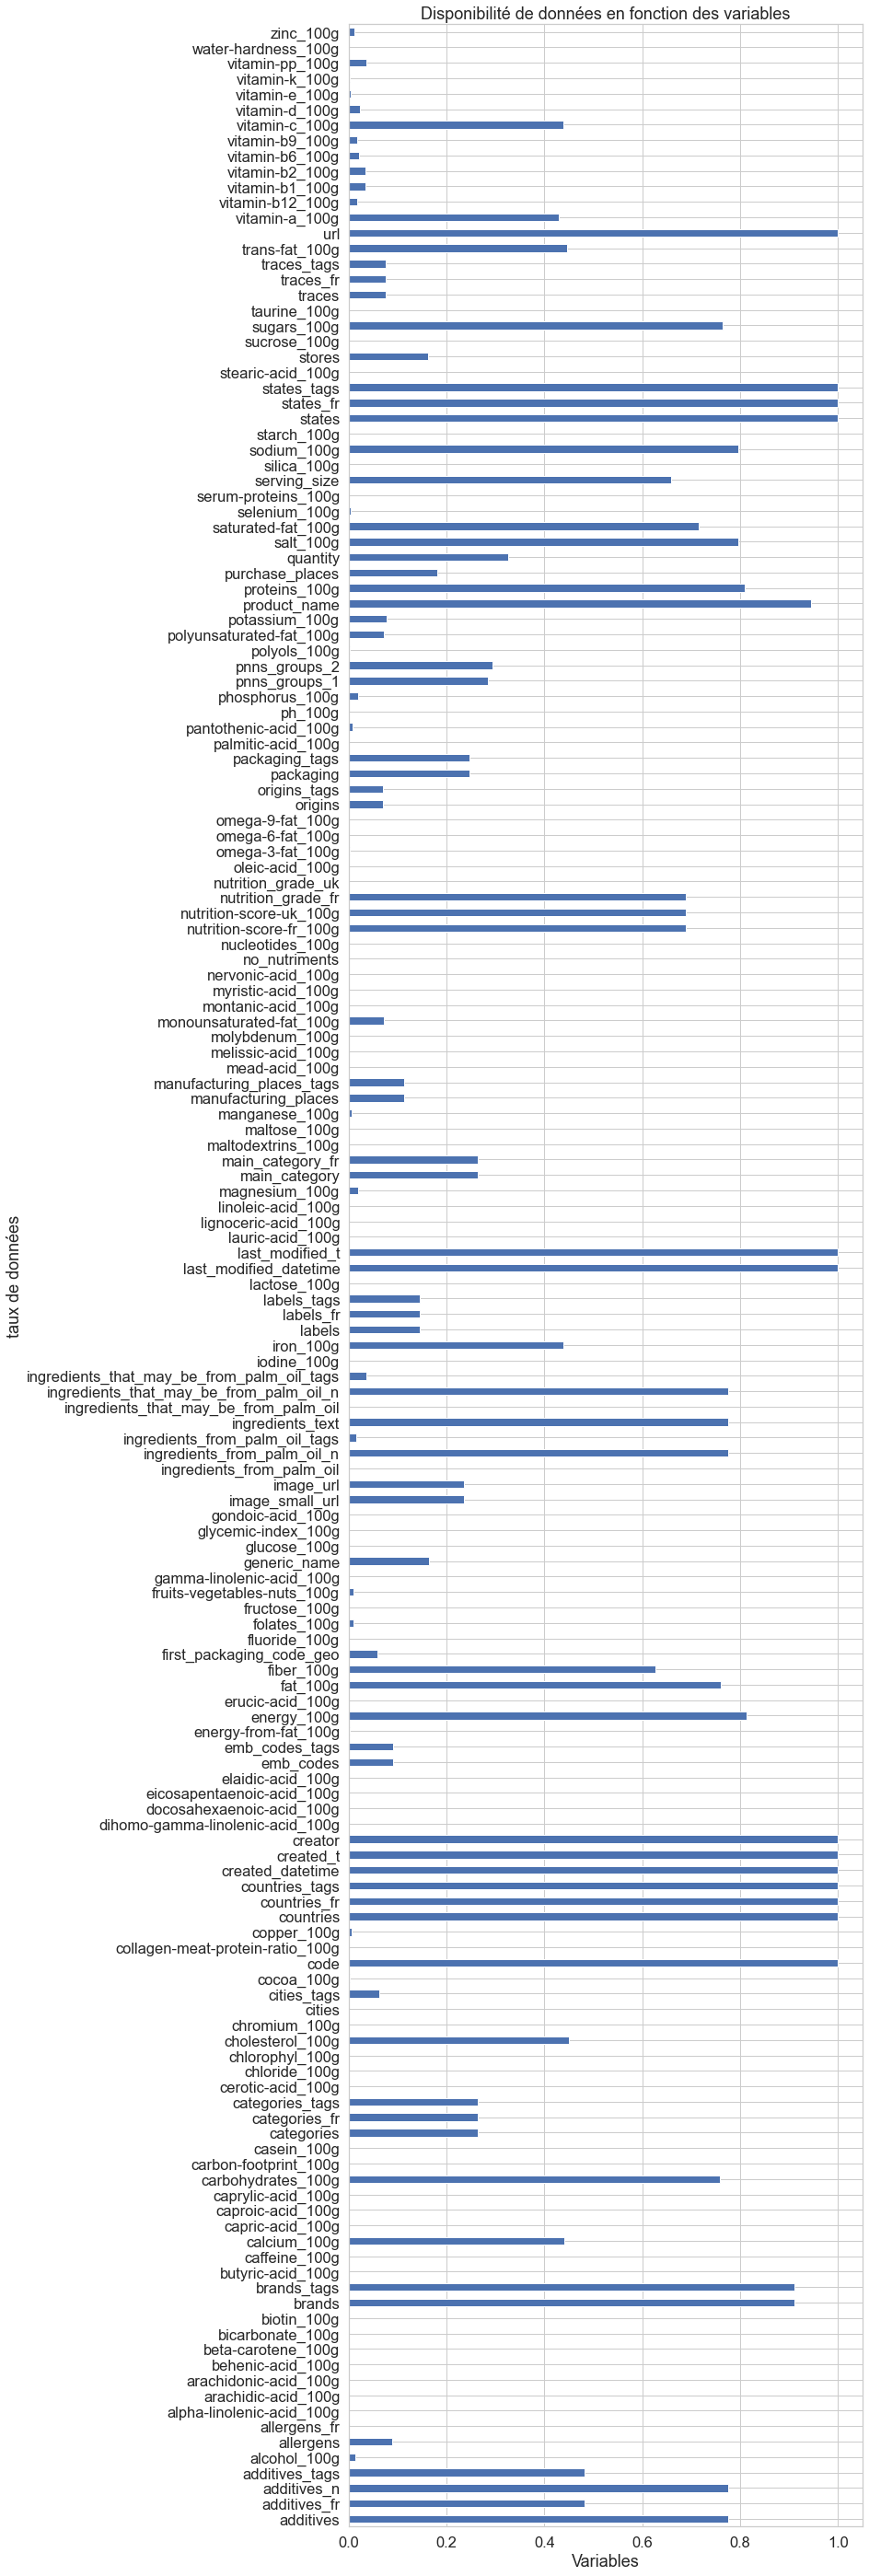

In [189]:
plt.figure(figsize=(10,50))
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.ylabel(ylabel='taux de données')
plt.xlabel(xlabel='Variables')
plt.title("Disponibilité de données en fonction des variables")
final_df_completitude1=complitude_rate_first.sort_index()
final_df_completitude1.plot(kind="barh")
plt.show()

### Sélection des variables qui ont un taux de complétude de plus de 50%

In [190]:
list_of_variables=final_df_completitude1[final_df_completitude1 > 0.5].index.tolist()
list_of_variables 

['additives',
 'additives_n',
 'brands',
 'brands_tags',
 'carbohydrates_100g',
 'code',
 'countries',
 'countries_fr',
 'countries_tags',
 'created_datetime',
 'created_t',
 'creator',
 'energy_100g',
 'fat_100g',
 'fiber_100g',
 'ingredients_from_palm_oil_n',
 'ingredients_text',
 'ingredients_that_may_be_from_palm_oil_n',
 'last_modified_datetime',
 'last_modified_t',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g',
 'nutrition_grade_fr',
 'product_name',
 'proteins_100g',
 'salt_100g',
 'saturated-fat_100g',
 'serving_size',
 'sodium_100g',
 'states',
 'states_fr',
 'states_tags',
 'sugars_100g',
 'url']

### Nous allons continuer avec le dataframe où nous avons sélectionner notre liste de données qui ont au moins 50% de données

In [191]:
df_completitude=data.loc[:,list_of_variables]
df_completitude

,additives,additives_n,brands,brands_tags,carbohydrates_100g,code,countries,countries_fr,countries_tags,created_datetime,...,proteins_100g,salt_100g,saturated-fat_100g,serving_size,sodium_100g,states,states_fr,states_tags,sugars_100g,url
0,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,3087,en:FR,France,en:france,2016-09-17T09:17:46Z,...,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","A compléter,Informations nutritionnelles à com...","en:to-be-completed,en:nutrition-facts-to-be-co...",NaN,http://world-fr.openfoodfacts.org/produit/0000...
1,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,NaN,NaN,64.29,4530,US,États-Unis,en:united-states,2017-03-09T14:32:37Z,...,3.57,0.00000,28.57,28 g (1 ONZ),0.000,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...",14.29,http://world-fr.openfoodfacts.org/produit/0000...
2,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,Torn & Glasser,torn-glasser,60.71,4559,US,États-Unis,en:united-states,2017-03-09T14:32:37Z,...,17.86,0.63500,0.00,28 g (0.25 cup),0.250,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...",17.86,http://world-fr.openfoodfacts.org/produit/0000...
3,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,Grizzlies,grizzlies,17.86,16087,US,États-Unis,en:united-states,2017-03-09T10:35:31Z,...,17.86,1.22428,5.36,28 g (0.25 cup),0.482,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...",3.57,http://world-fr.openfoodfacts.org/produit/0000...
4,[ organic-polenta -> en:organic-polenta ] [...,0.0,Bob's Red Mill,bob-s-red-mill,77.14,16094,US,États-Unis,en:united-states,2017-03-09T10:34:13Z,...,8.57,NaN,NaN,35 g (0.25 cup),NaN,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...",NaN,http://world-fr.openfoodfacts.org/produit/0000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,Panzani,panzani,NaN,9948282780603,en:RO,Roumanie,en:romania,2017-03-27T16:14:59Z,...,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","A compléter,Informations nutritionnelles à com...","en:to-be-completed,en:nutrition-facts-to-be-co...",NaN,http://world-fr.openfoodfacts.org/produit/9948...
320768,[ organic-peppermint -> en:organic-peppermint...,0.0,Trader Joe's,trader-joe-s,0.00,99567453,US,États-Unis,en:united-states,2017-03-09T11:31:16Z,...,0.00,0.00000,0.00,20 g (0.7 oz),0.000,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...",0.00,http://world-fr.openfoodfacts.org/produit/9956...
320769,NaN,NaN,乐吧,乐吧,NaN,9970229501521,China,Chine,en:china,2015-01-24T11:36:17Z,...,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","A compléter,Informations nutritionnelles à com...","en:to-be-completed,en:nutrition-facts-to-be-co...",NaN,http://world-fr.openfoodfacts.org/produit/9970...
320770,NaN,NaN,Knorr,knorr,NaN,9980282863788,en:FR,France,en:france,2017-04-16T10:54:49Z,...,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","A compléter,Informations nutritionnelles à com...","en:to-be-completed,en:nutrition-facts-to-be-co...",NaN,http://world-fr.openfoodfacts.org/produit/9980...


In [192]:
df_completitude.shape

(320772, 34)

### Nouveau taux de complétitude avec les variables sélectionner 

In [193]:
complitude_rate_second=df_completitude.notnull().sum()/df_completitude.shape[0]

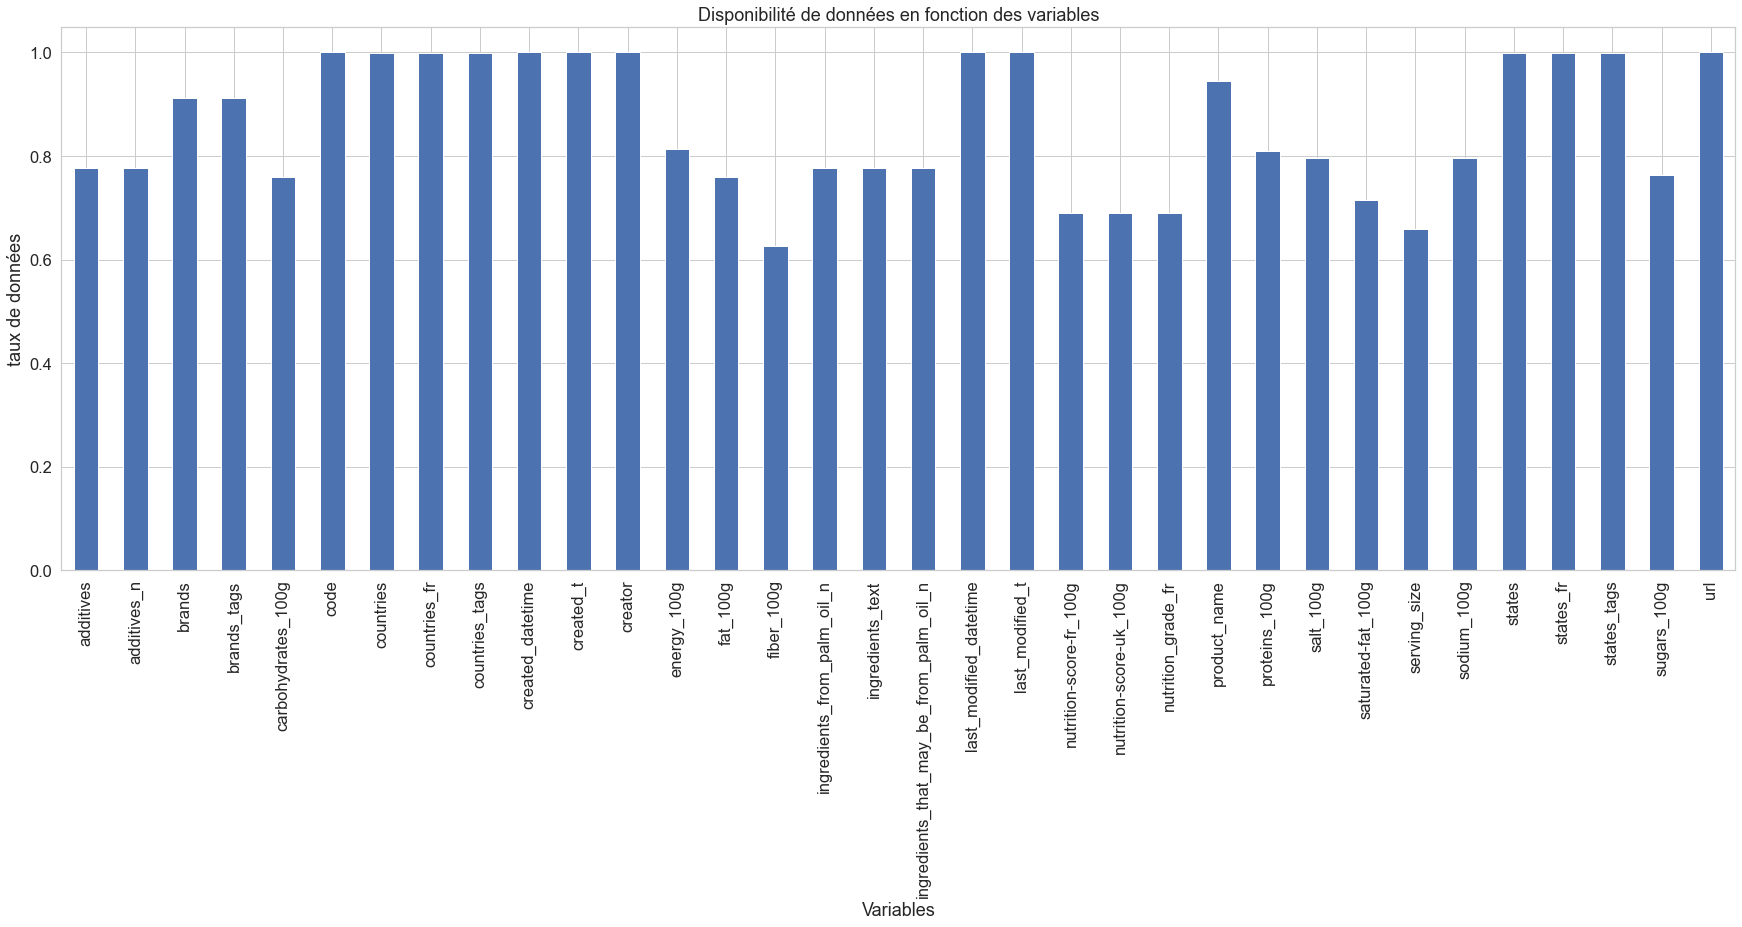

In [194]:
plt.figure(figsize=(30,10))
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.ylabel(ylabel='taux de données')
plt.xlabel(xlabel='Variables')
plt.title("Disponibilité de données en fonction des variables")
final_df_completitude2=complitude_rate_second.sort_index()
final_df_completitude2.plot(kind="bar")
plt.show()

### Sélection des variables qui vont finalement nous intéresser

In [195]:
new_list_of_variables = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
                                 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g','nutrition-score-fr_100g']

df_final_completude = df_completitude.loc[:,new_list_of_variables]
df_final_completude

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
2,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0
3,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
4,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


axis = 1 signifie colonne 

In [196]:
df_final = pd.concat([new_dataframe, df_final_completude], axis=1)
df_final

,code,pnns_groups_2,pnns_groups_1,nutrition_grade_fr,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,3087,NaN,NaN,NaN,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,NaN,NaN,d,Banana Chips Sweetened (Whole),2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
2,4559,NaN,NaN,b,Peanuts,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0
3,16087,NaN,NaN,d,Organic Salted Nut Mix,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
4,16094,NaN,NaN,NaN,Organic Polenta,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,NaN,NaN,NaN,Tomato & ricotta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,NaN,NaN,b,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0
320769,9970229501521,Appetizers,Salty snacks,NaN,乐吧泡菜味薯片,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,NaN,NaN,NaN,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
numeric_columns = df_final.columns
numeric_columns


Index(['code', 'pnns_groups_2', 'pnns_groups_1', 'nutrition_grade_fr',
       'product_name', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [198]:
df_final_completude

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
2,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0
3,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
4,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### On continue avec le df_final

In [199]:
df_final.head(4)

,code,pnns_groups_2,pnns_groups_1,nutrition_grade_fr,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,3087,NaN,NaN,NaN,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,NaN,NaN,d,Banana Chips Sweetened (Whole),2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
2,4559,NaN,NaN,b,Peanuts,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0
3,16087,NaN,NaN,d,Organic Salted Nut Mix,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0


### Le nombre de cellules vides pour nos données

In [200]:
# Récupération des colonnes avec moins de80% de NaN
cols = []
for i in range(len(df_final.columns)):
    temp =int(df_final[df_final.columns[i]].isnull().sum()/df_final.shape[0]*100)
    print(df_final.columns[i],' - ', temp, '% de cellules vides' )

code  -  0 % de cellules vides
pnns_groups_2  -  70 % de cellules vides
pnns_groups_1  -  71 % de cellules vides
nutrition_grade_fr  -  31 % de cellules vides
product_name  -  5 % de cellules vides
energy_100g  -  18 % de cellules vides
fat_100g  -  23 % de cellules vides
saturated-fat_100g  -  28 % de cellules vides
carbohydrates_100g  -  24 % de cellules vides
sugars_100g  -  23 % de cellules vides
fiber_100g  -  37 % de cellules vides
proteins_100g  -  18 % de cellules vides
salt_100g  -  20 % de cellules vides
sodium_100g  -  20 % de cellules vides
nutrition-score-fr_100g  -  31 % de cellules vides


### Boites à Moustaches pour le traitement des valeures abbérantes 

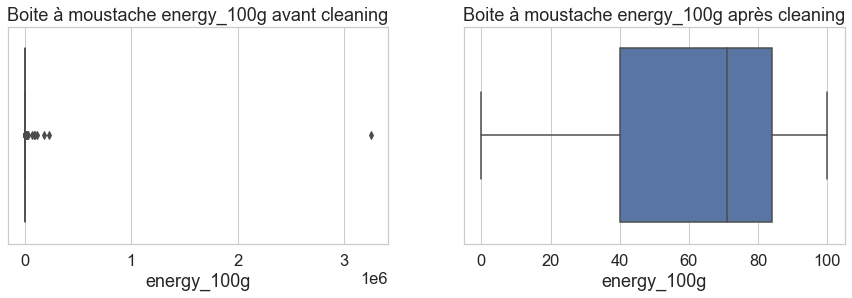

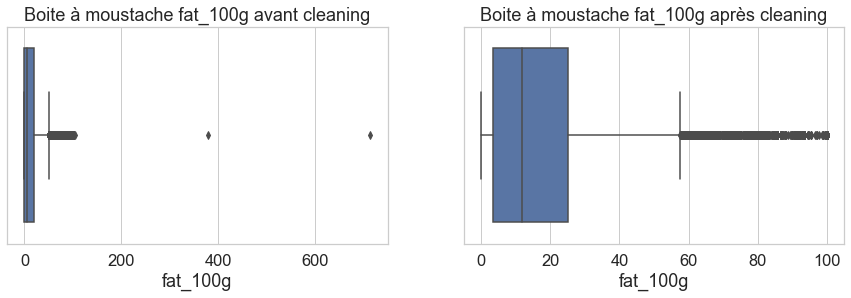

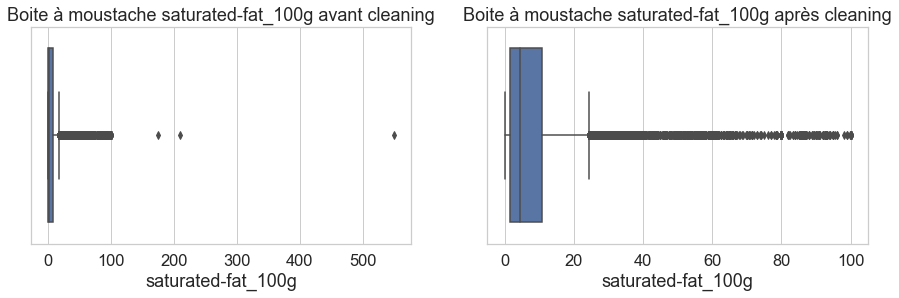

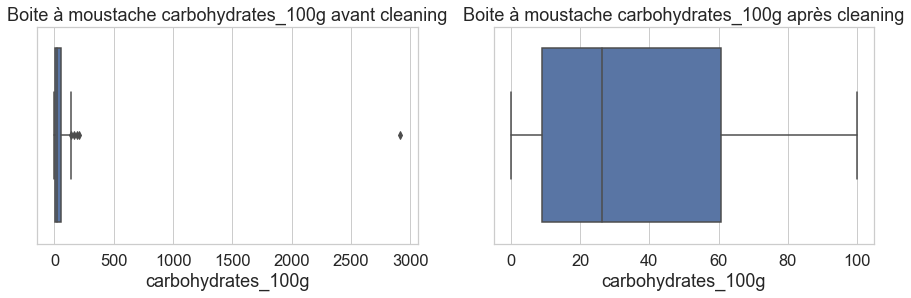

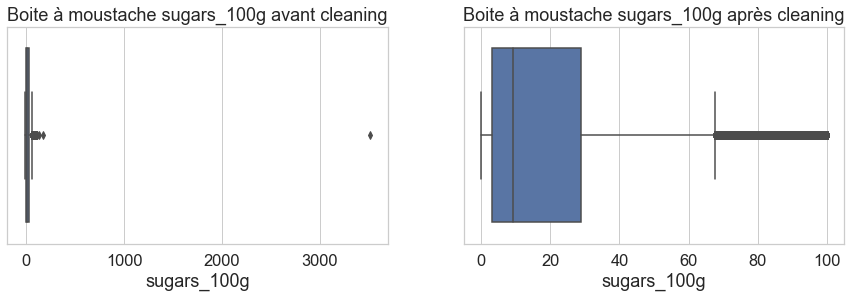

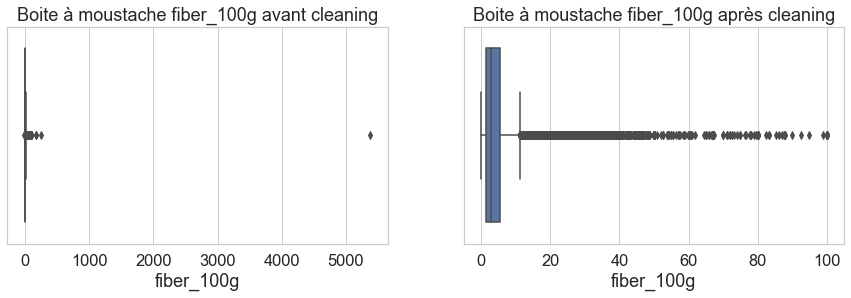

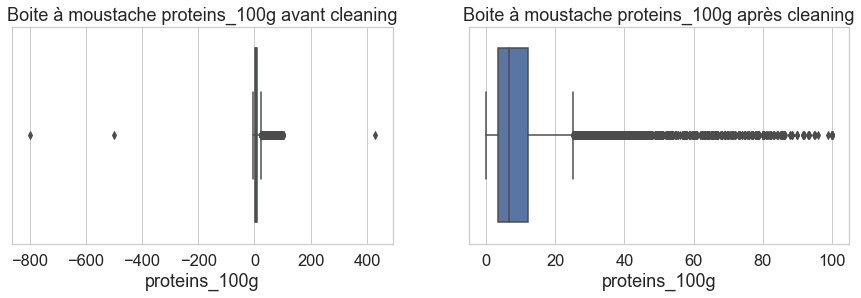

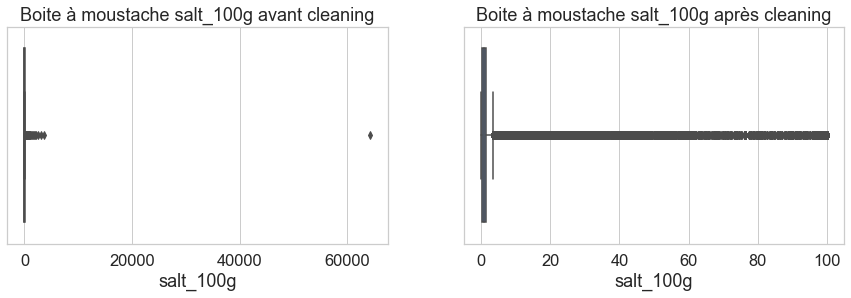

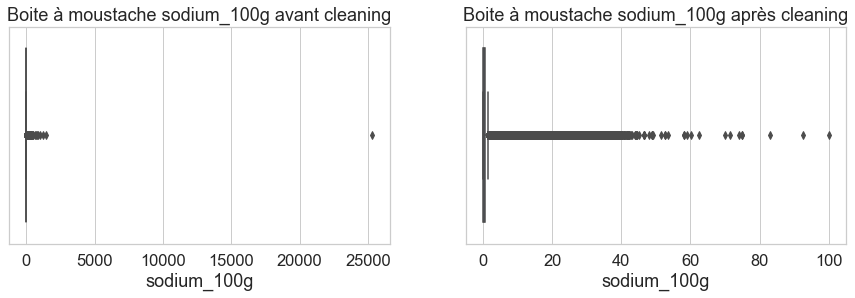

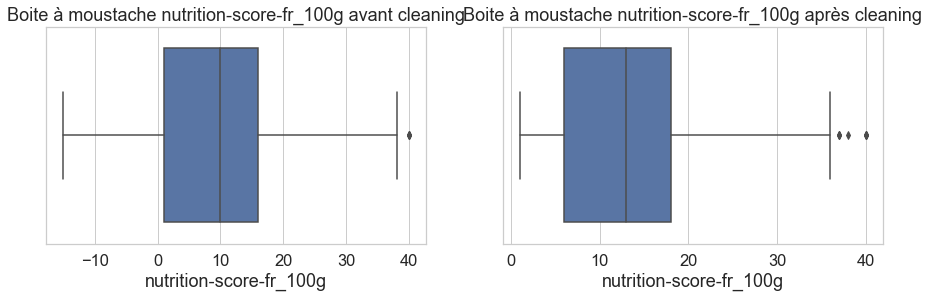

In [201]:
data_final = df_final.copy()
for var_name in new_list_of_variables:
    fig, axs = plt.subplots(1,2,figsize=(15,4),sharey=True)
    data_avant= data_final[var_name].copy()

    sns.boxplot(x=data_avant,ax=axs[0])
    axs[0].set_title(f'Boite à moustache {var_name} avant cleaning')

    data_final[var_name]= data_final[var_name].where((data_final[var_name]<=100) & (data_final[var_name]>0))

    sns.boxplot(x=data_final[var_name],ax=axs[1])
    axs[1].set_title(f'Boite à moustache {var_name} après cleaning')

In [202]:
data_final.head(4)

,code,pnns_groups_2,pnns_groups_1,nutrition_grade_fr,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,3087,NaN,NaN,NaN,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,NaN,NaN,d,Banana Chips Sweetened (Whole),NaN,28.57,28.57,64.29,14.29,3.6,3.57,NaN,NaN,14.0
2,4559,NaN,NaN,b,Peanuts,NaN,17.86,NaN,60.71,17.86,7.1,17.86,0.63500,0.250,NaN
3,16087,NaN,NaN,d,Organic Salted Nut Mix,NaN,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0


### Gestion des doublons

In [203]:
def number_duplicates(dataframe, subset):
    """This function displays and return the number of duplicate in a dataset,
    based on a subset of columns."""
    
    # Marking all duplicates
    duplicates = dataframe.duplicated(subset=subset, keep=False)
    
    # If there are duplicated rows
    if True in list(duplicates.unique()):
        
        # Display and return number of duplicated rows
        result = len(dataframe[duplicates])
        print("There are {} duplicated rows.".format(result))
        return result
    
    # If there are no duplicated rows
    else:
        print("There are no duplicated rows.")
        return 0

In [204]:
dataframe = data_final
subset = ["code"]

number_duplicates(dataframe, subset)

There are 245 duplicated rows.


245

In [205]:
def duplicates_merging(dataframe,subset):
    """This function handles duplicates rows in the dataframe, based on a subset of columns (features)."""

    # Checking if there are some duplicated rows
    duplicates_mask = dataframe.duplicated(subset=subset, keep=False)
    if True not in list(duplicates_mask.unique()):
        print("No duplicates.")
        return dataframe
    
    print("Number of duplicates rows :", len(dataframe[duplicates_mask]))
    
    # Filtering the dataframe to keep only duplicated rows
    duplicates_mask = dataframe.duplicated(subset=subset, keep=False)
    duplicates_df = dataframe[duplicates_mask]

    # Group-by subset of columns used for key, sort=False to speed-up
    gb = duplicates_df.groupby(subset, sort=False)

    # Initializing aggregated dataframe
    agg_df = pd.DataFrame()

    # Identification of numerical and non-numerical columns
    numeric_columns = list(dataframe.select_dtypes(include=[np.number]).columns.values)

    # defining aggregation function for non-numerical columns
    def agg_mode(x): m = pd.Series.mode(x); return m.values[0] if not m.empty else np.nan

    # Iterating upon columns
    for column in dataframe.columns:

        # Calculate the mean of each group for numeric columns
        if column in numeric_columns:
            agg_col = gb[column].agg('mean')

        # Calculate the mode of each group for numeric columns
        else:
            agg_col = gb[column].agg(agg_mode)
            
        # adding the aggregated column to aggregated dataframe
        agg_df = pd.concat([agg_df, agg_col], axis=1, sort=True)

    # Dropping all duplicates
    dataframe_cleaned = dataframe.drop_duplicates(subset=subset, keep=False)

    # Concatenating the dataframe without duplicates and the aggregated rows for duplicates
    result = dataframe_cleaned.append(agg_df, ignore_index=True, sort=False)

    print("Shape after handling duplicates :", result.shape)
    return result

In [206]:
dataframe = df_final
subset = ['code']

data_cleaned = duplicates_merging(dataframe,subset)

Number of duplicates rows : 245
Shape after handling duplicates : (320638, 15)


Nous constatons qu'il n y a pas des colonnes sont intégralement remplis mais quelques unes qui y sont presque.

Nous constatons aussi que de nombreuses colonnes sont très faiblement ou pas du tout remplies. Ainsi, environ une dizaine d'indicateurs (sur les 12 que contient encore la table) ont un remplissage inférieur à 5%.


### Traitement des valeurs manquantes

### Premier méthode :  Moyenne par pnns group 1 et 2

In [207]:
data_final_par_la_moyenne = data_final.copy()
data_final_par_la_moyenne

,code,pnns_groups_2,pnns_groups_1,nutrition_grade_fr,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,3087,NaN,NaN,NaN,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,NaN,NaN,d,Banana Chips Sweetened (Whole),NaN,28.57,28.57,64.29,14.29,3.6,3.57,NaN,NaN,14.0
2,4559,NaN,NaN,b,Peanuts,NaN,17.86,NaN,60.71,17.86,7.1,17.86,0.63500,0.250,NaN
3,16087,NaN,NaN,d,Organic Salted Nut Mix,NaN,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
4,16094,NaN,NaN,NaN,Organic Polenta,NaN,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,NaN,NaN,NaN,Tomato & ricotta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,NaN,NaN,b,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320769,9970229501521,Appetizers,Salty snacks,NaN,乐吧泡菜味薯片,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,NaN,NaN,NaN,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
data_final_par_la_moyenne['pnns_groups_1'] = data_final_par_la_moyenne['pnns_groups_1'].replace(np.nan,"Groupe Inconnu")
data_final_par_la_moyenne['pnns_groups_2'] = data_final_par_la_moyenne['pnns_groups_2'].replace(np.nan,"Groupe Inconnu")
data_final_par_la_moyenne


,code,pnns_groups_2,pnns_groups_1,nutrition_grade_fr,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,3087,Groupe Inconnu,Groupe Inconnu,NaN,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,Groupe Inconnu,Groupe Inconnu,d,Banana Chips Sweetened (Whole),NaN,28.57,28.57,64.29,14.29,3.6,3.57,NaN,NaN,14.0
2,4559,Groupe Inconnu,Groupe Inconnu,b,Peanuts,NaN,17.86,NaN,60.71,17.86,7.1,17.86,0.63500,0.250,NaN
3,16087,Groupe Inconnu,Groupe Inconnu,d,Organic Salted Nut Mix,NaN,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
4,16094,Groupe Inconnu,Groupe Inconnu,NaN,Organic Polenta,NaN,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,Groupe Inconnu,Groupe Inconnu,NaN,Tomato & ricotta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,Groupe Inconnu,Groupe Inconnu,b,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320769,9970229501521,Appetizers,Salty snacks,NaN,乐吧泡菜味薯片,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,Groupe Inconnu,Groupe Inconnu,NaN,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
data_final_par_la_moyenne.columns


Index(['code', 'pnns_groups_2', 'pnns_groups_1', 'nutrition_grade_fr',
       'product_name', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [210]:
list_moyenne = ['pnns_groups_2', 'pnns_groups_1','energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g']

In [211]:
data_final_par_la_moyenne = data_final_par_la_moyenne.loc[:,list_moyenne]
data_final_par_la_moyenne

,pnns_groups_2,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,Groupe Inconnu,Groupe Inconnu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Groupe Inconnu,Groupe Inconnu,NaN,28.57,28.57,64.29,14.29,3.6,3.57,NaN,NaN
2,Groupe Inconnu,Groupe Inconnu,NaN,17.86,NaN,60.71,17.86,7.1,17.86,0.63500,0.250
3,Groupe Inconnu,Groupe Inconnu,NaN,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482
4,Groupe Inconnu,Groupe Inconnu,NaN,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
320767,Groupe Inconnu,Groupe Inconnu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,Groupe Inconnu,Groupe Inconnu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320769,Appetizers,Salty snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,Groupe Inconnu,Groupe Inconnu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
cols = []
for i in range(len(data_final_par_la_moyenne.columns)):
    temp =int(data_final_par_la_moyenne[data_final_par_la_moyenne.columns[i]].isnull().sum()/data_final_par_la_moyenne.shape[0]*100)
    print(data_final_par_la_moyenne.columns[i],' - ', temp, '% de cellules vides' )

pnns_groups_2  -  0 % de cellules vides
pnns_groups_1  -  0 % de cellules vides
energy_100g  -  97 % de cellules vides
fat_100g  -  44 % de cellules vides
saturated-fat_100g  -  49 % de cellules vides
carbohydrates_100g  -  30 % de cellules vides
sugars_100g  -  35 % de cellules vides
fiber_100g  -  58 % de cellules vides
proteins_100g  -  35 % de cellules vides
salt_100g  -  31 % de cellules vides
sodium_100g  -  31 % de cellules vides


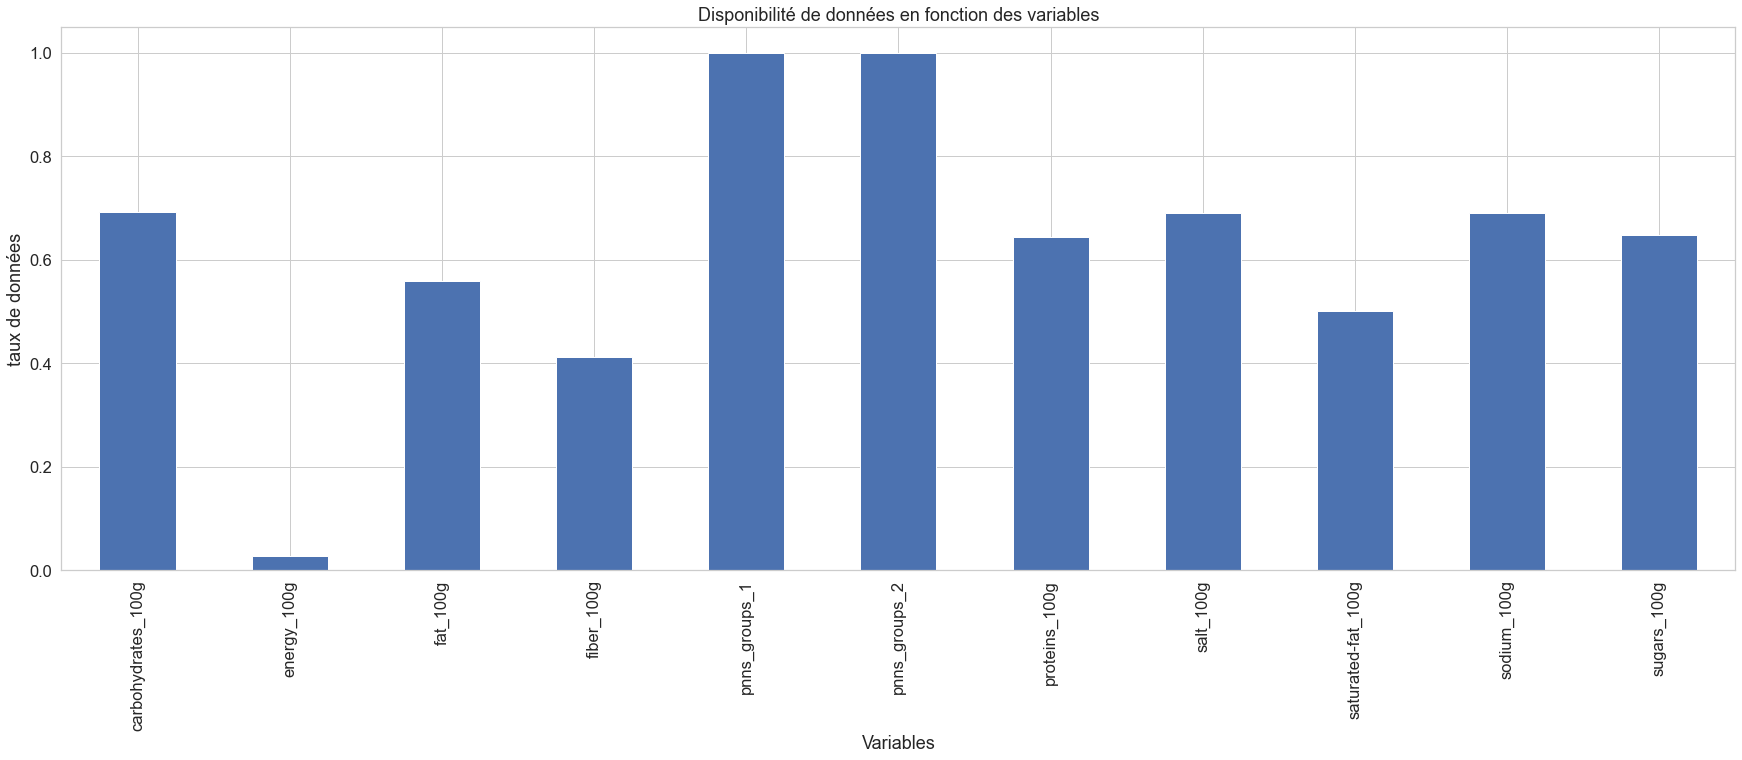

In [213]:
complitude_rate_data_final_par_la_moyenne=data_final_par_la_moyenne.notnull().sum()/data_final_par_la_moyenne.shape[0]

plt.figure(figsize=(30,10))
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.ylabel(ylabel='taux de données')
plt.xlabel(xlabel='Variables')
plt.title("Disponibilité de données en fonction des variables")
final_df_completitude2=complitude_rate_data_final_par_la_moyenne.sort_index()
final_df_completitude2.plot(kind="bar")
plt.show()

### Nous faisons ici un groupby par Pnns 1 & Pnns 2 et ensuite nous allons calculer la moyenne pour les imputer dans notre modèle

In [214]:
data_moyenne = data_final_par_la_moyenne[(data_final_par_la_moyenne["pnns_groups_1"].isna()==False) & (data_final_par_la_moyenne["pnns_groups_2"].isna()==False)]
final_data_moyenne  = data_moyenne.groupby(by=['pnns_groups_1','pnns_groups_2']).mean()

In [215]:
final_data_moyenne

energy_100g  \
pnns_groups_1           pnns_groups_2                                   
Beverages               Artificially sweetened beverages    29.023150   
                        Fruit juices                        66.411538   
                        Fruit nectars                       87.142857   
                        Non-sugared beverages               35.563384   
                        Sweetened beverages                 52.714708   
Cereals and potatoes    Bread                                1.486000   
                        Breakfast cereals                         NaN   
                        Cereals                             70.148333   
                        Legumes                             85.598750   
                        Potatoes                                  NaN   
Composite foods         One-dish meals                      78.219333   
                        Pizza pies and quiche                     NaN   
                        Sandwich                                  NaN   
Fat and sauces          Dressings and sauces                67.140500   
                        Fats                                62.500000   
Fish Meat Eggs          Eggs                                      NaN   
                        Fish and seafood                    67.000000   
                        Meat                                      NaN   
                        Processed meat                       1.849000   
Fruits and vegetables   Dried fruits                              NaN   
                        Fruits                              63.088750   
                        Soups                               75.275000   
                        Vegetables                          75.100622   
Groupe Inconnu          Alcoholic beverages                 62.714286   
                        Groupe Inconnu                      63.496430   
                        Tripe dishes                              NaN   
Milk and dairy products Cheese                               1.000000   
                        Dairy desserts                            NaN   
                        Ice cream                           92.000000   
                        Milk and yogurt                     73.262500   
Salty snacks            Appetizers                          58.500000   
                        Nuts                                      NaN   
                        Salty and fatty products                  NaN   
Sugary snacks           Biscuits and cakes                  63.000000   
                        Chocolate products                  42.500000   
                        Sweets                              55.820000   
cereals-and-potatoes    cereals                                   NaN   
                        legumes                                   NaN   
fruits-and-vegetables   fruits                                    NaN   
                        vegetables                          75.704167   
salty-snacks            nuts                                      NaN   
sugary-snacks           pastries                                  NaN   
unknown                 unknown                             52.644338   

                                                           fat_100g  \
pnns_groups_1           pnns_groups_2                                 
Beverages               Artificially sweetened beverages   0.425725   
                        Fruit juices                       0.275630   
                        Fruit nectars                      0.243208   
                        Non-sugared beverages              3.157227   
                        Sweetened beverages                1.650425   
Cereals and potatoes    Bread                              5.883699   
                        Breakfast cereals                  8.755650   
                        Cereals                            4.581937   
                        Legumes                            9.6

In [216]:
def impute_row(row):
    pnns_groups_1  = row["pnns_groups_1"]
    pnns_groups_2 = row ["pnns_groups_2"]
    na_cols = row[row.isna()==True].index
    row[na_cols]= final_data_moyenne.loc[(pnns_groups_1,pnns_groups_2)][na_cols]
    return row


In [217]:
final_data_moyenne2=data_final_par_la_moyenne.apply(func=impute_row,axis=1)
final_data_moyenne2

,pnns_groups_2,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,Groupe Inconnu,Groupe Inconnu,63.49643,18.577438,7.912272,37.486048,20.676086,4.572611,9.321240,2.049742,0.838578
1,Groupe Inconnu,Groupe Inconnu,63.49643,28.570000,28.570000,64.290000,14.290000,3.600000,3.570000,2.049742,0.838578
2,Groupe Inconnu,Groupe Inconnu,63.49643,17.860000,7.912272,60.710000,17.860000,7.100000,17.860000,0.635000,0.250000
3,Groupe Inconnu,Groupe Inconnu,63.49643,57.140000,5.360000,17.860000,3.570000,7.100000,17.860000,1.224280,0.482000
4,Groupe Inconnu,Groupe Inconnu,63.49643,1.430000,7.912272,77.140000,20.676086,5.700000,8.570000,2.049742,0.838578
...,...,...,...,...,...,...,...,...,...,...,...
320767,Groupe Inconnu,Groupe Inconnu,63.49643,18.577438,7.912272,37.486048,20.676086,4.572611,9.321240,2.049742,0.838578
320768,Groupe Inconnu,Groupe Inconnu,63.49643,18.577438,7.912272,37.486048,20.676086,4.572611,9.321240,2.049742,0.838578
320769,Appetizers,Salty snacks,58.50000,25.906937,5.219764,53.342058,4.202203,4.236907,7.800978,1.771414,0.697400
320770,Groupe Inconnu,Groupe Inconnu,63.49643,18.577438,7.912272,37.486048,20.676086,4.572611,9.321240,2.049742,0.838578


In [218]:
cols = []
for i in range(len(final_data_moyenne2.columns)):
    temp =int(final_data_moyenne2[final_data_moyenne2.columns[i]].isnull().sum()/final_data_moyenne2.shape[0]*100)
    print(final_data_moyenne2.columns[i],' - ', temp, '% de cellules vides' )

pnns_groups_2  -  0 % de cellules vides
pnns_groups_1  -  0 % de cellules vides
energy_100g  -  2 % de cellules vides
fat_100g  -  0 % de cellules vides
saturated-fat_100g  -  0 % de cellules vides
carbohydrates_100g  -  0 % de cellules vides
sugars_100g  -  0 % de cellules vides
fiber_100g  -  0 % de cellules vides
proteins_100g  -  0 % de cellules vides
salt_100g  -  0 % de cellules vides
sodium_100g  -  0 % de cellules vides


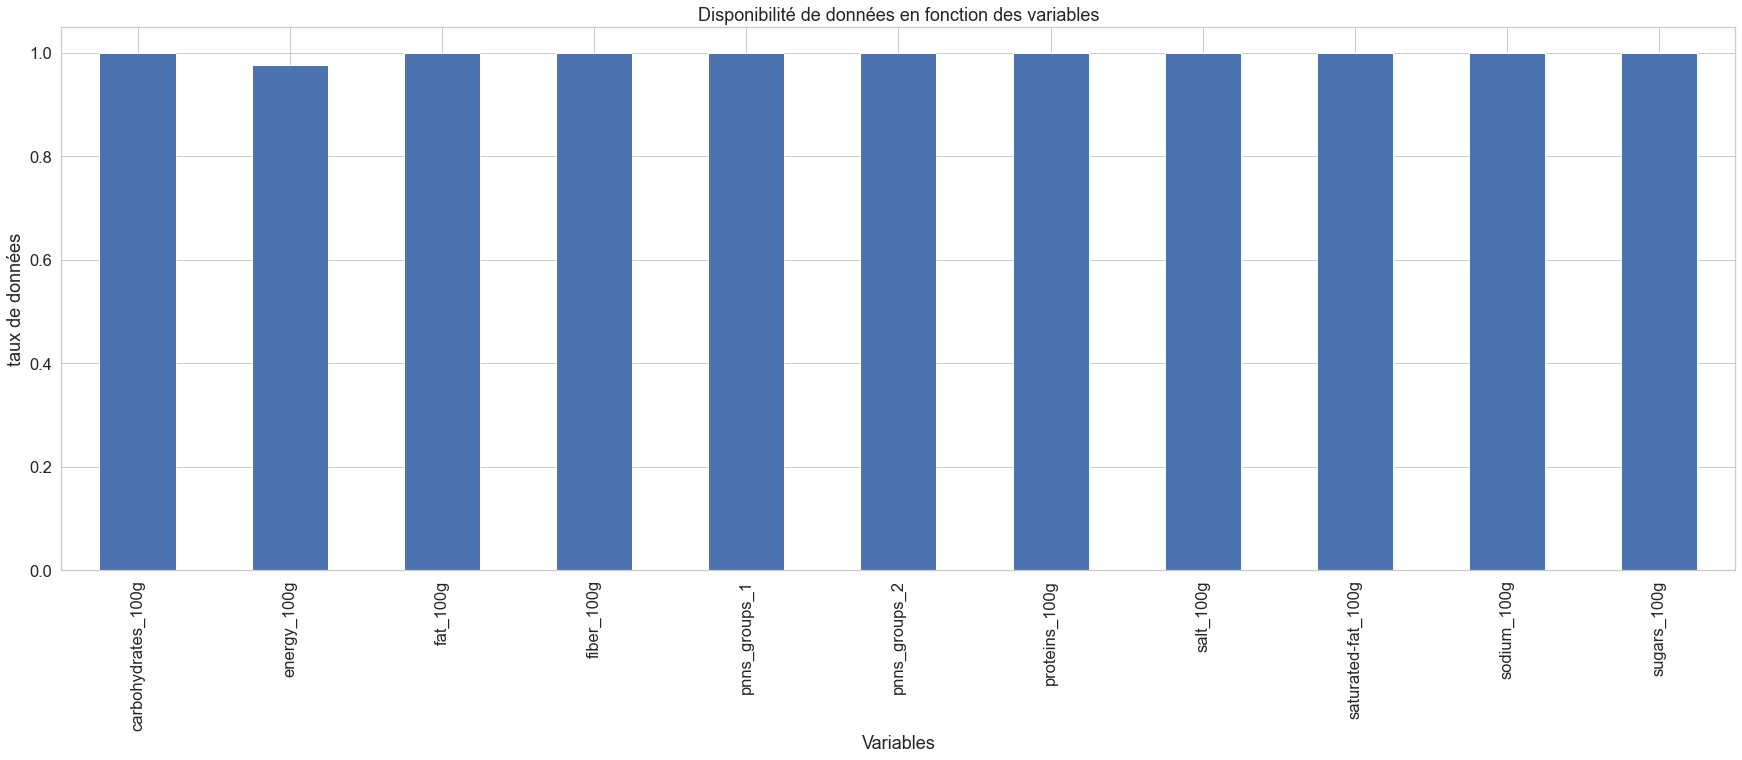

In [219]:
complitude_rate_data_final_par_la_moyenne2=final_data_moyenne2.notnull().sum()/final_data_moyenne2.shape[0]

plt.figure(figsize=(30,10))
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.ylabel(ylabel='taux de données')
plt.xlabel(xlabel='Variables')
plt.title("Disponibilité de données en fonction des variables")
final_df_completitude2=complitude_rate_data_final_par_la_moyenne2.sort_index()
final_df_completitude2.plot(kind="bar")
plt.show()

In [220]:
final_data_moyenne2.head(1)

,pnns_groups_2,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,Groupe Inconnu,Groupe Inconnu,63.49643,18.577438,7.912272,37.486048,20.676086,4.572611,9.32124,2.049742,0.838578


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='energy_100g', ylabel='Density'>

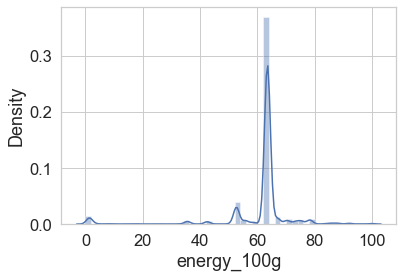

In [221]:
sns.distplot(final_data_moyenne2.energy_100g)

In [222]:
new_list_of_variables.remove('nutrition-score-fr_100g')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fat_100g', ylabel='Density'>

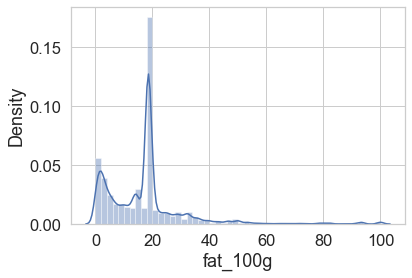

In [223]:
sns.distplot(final_data_moyenne2.fat_100g)

In [224]:
final_data_moyenne2.columns

Index(['pnns_groups_2', 'pnns_groups_1', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carbohydrates_100g', ylabel='Density'>

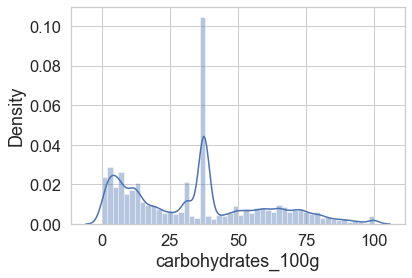

In [225]:
sns.distplot(final_data_moyenne2.carbohydrates_100g)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sugars_100g', ylabel='Density'>

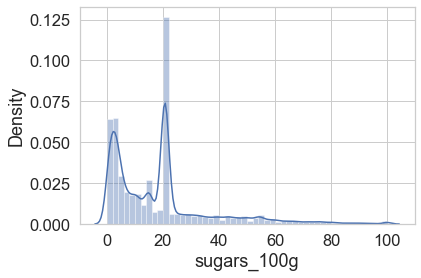

In [226]:
sns.distplot(final_data_moyenne2.sugars_100g)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fiber_100g', ylabel='Density'>

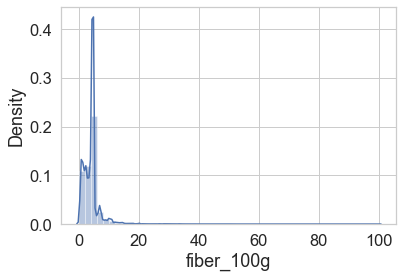

In [227]:
sns.distplot(final_data_moyenne2.fiber_100g)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='proteins_100g', ylabel='Density'>

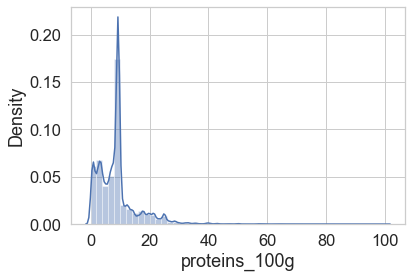

In [228]:
sns.distplot(final_data_moyenne2.proteins_100g)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salt_100g', ylabel='Density'>

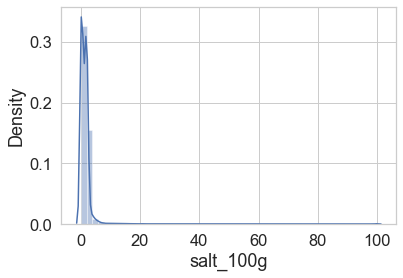

In [229]:
sns.distplot(final_data_moyenne2.salt_100g)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sodium_100g', ylabel='Density'>

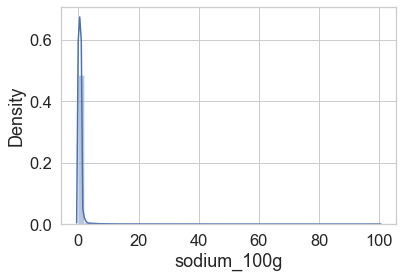

In [230]:
sns.distplot(final_data_moyenne2.sodium_100g)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sodium_100g', ylabel='Density'>

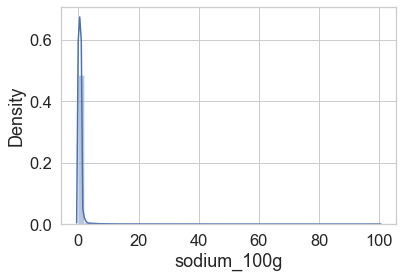

In [231]:
sns.distplot(final_data_moyenne2.sodium_100g)

for var_mean in new_list_of_variables:
    name = var_mean
    print(name)
    sns.distplot(final_data_moyenne2.name)

In [232]:
data_final_par_la_moyenne.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,9122.00000,179383.000000,160815.000000,221962.000000,207875.000000,132048.000000,206287.000000,2.211780e+05,2.212980e+05
mean,61.42957,17.301107,7.316862,35.175765,18.836645,4.308964,8.919932,1.833934e+00,7.469544e-01
std,29.73119,18.367978,8.565257,28.671920,21.775376,5.065973,8.210266,6.673844e+00,2.840755e+00
min,0.02000,0.000100,0.000100,0.001000,0.000100,0.000100,0.000100,5.000000e-08,1.968504e-08
25%,40.02500,3.330000,1.540000,8.900000,3.200000,1.500000,3.330000,1.524000e-01,6.000000e-02
50%,71.00000,11.900000,4.500000,26.200000,9.100000,3.000000,6.670000,7.721600e-01,3.050000e-01
75%,84.00000,25.000000,10.700000,60.710000,28.950000,5.400000,12.100000,1.524000e+00,6.000000e-01
max,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02


In [233]:
final_data_moyenne2.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,313219.000000,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000,3.207720e+05,3.207720e+05
mean,60.900072,17.046125,7.184625,34.337344,18.530443,4.097862,8.763899,1.826024e+00,7.432455e-01
std,12.895738,14.294120,6.328918,24.880849,18.137628,3.401026,6.822592,5.553878e+00,2.364277e+00
min,0.020000,0.000100,0.000100,0.001000,0.000100,0.000100,0.000100,5.000000e-08,1.968504e-08
25%,63.496430,6.800000,2.940000,11.400000,3.800000,2.285269,3.919790,2.742772e-01,1.079804e-01
50%,63.496430,18.577438,7.912272,37.486048,15.620000,4.572611,9.090000,1.165860e+00,4.590000e-01
75%,63.496430,18.577438,7.912272,50.800000,20.676086,4.572611,9.321240,2.049742e+00,8.385780e-01
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02


### Deuxième méthode IterativeImputer 

In [234]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [235]:
data_final_imputer = df_final.copy()

In [236]:
list_of_variables = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
                                 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']

df_final_imputer2 = data_final_imputer.loc[:,list_of_variables]
df_final_imputer2

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000
2,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250
3,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482
4,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN
...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
cols = []
for i in range(len(df_final_imputer2.columns)):
    temp =int(df_final_imputer2[df_final_imputer2.columns[i]].isnull().sum()/df_final_imputer2.shape[0]*100)
    print(df_final_imputer2.columns[i],' - ', temp, '% de cellules vides' )

energy_100g  -  18 % de cellules vides
fat_100g  -  23 % de cellules vides
saturated-fat_100g  -  28 % de cellules vides
carbohydrates_100g  -  24 % de cellules vides
sugars_100g  -  23 % de cellules vides
fiber_100g  -  37 % de cellules vides
proteins_100g  -  18 % de cellules vides
salt_100g  -  20 % de cellules vides
sodium_100g  -  20 % de cellules vides


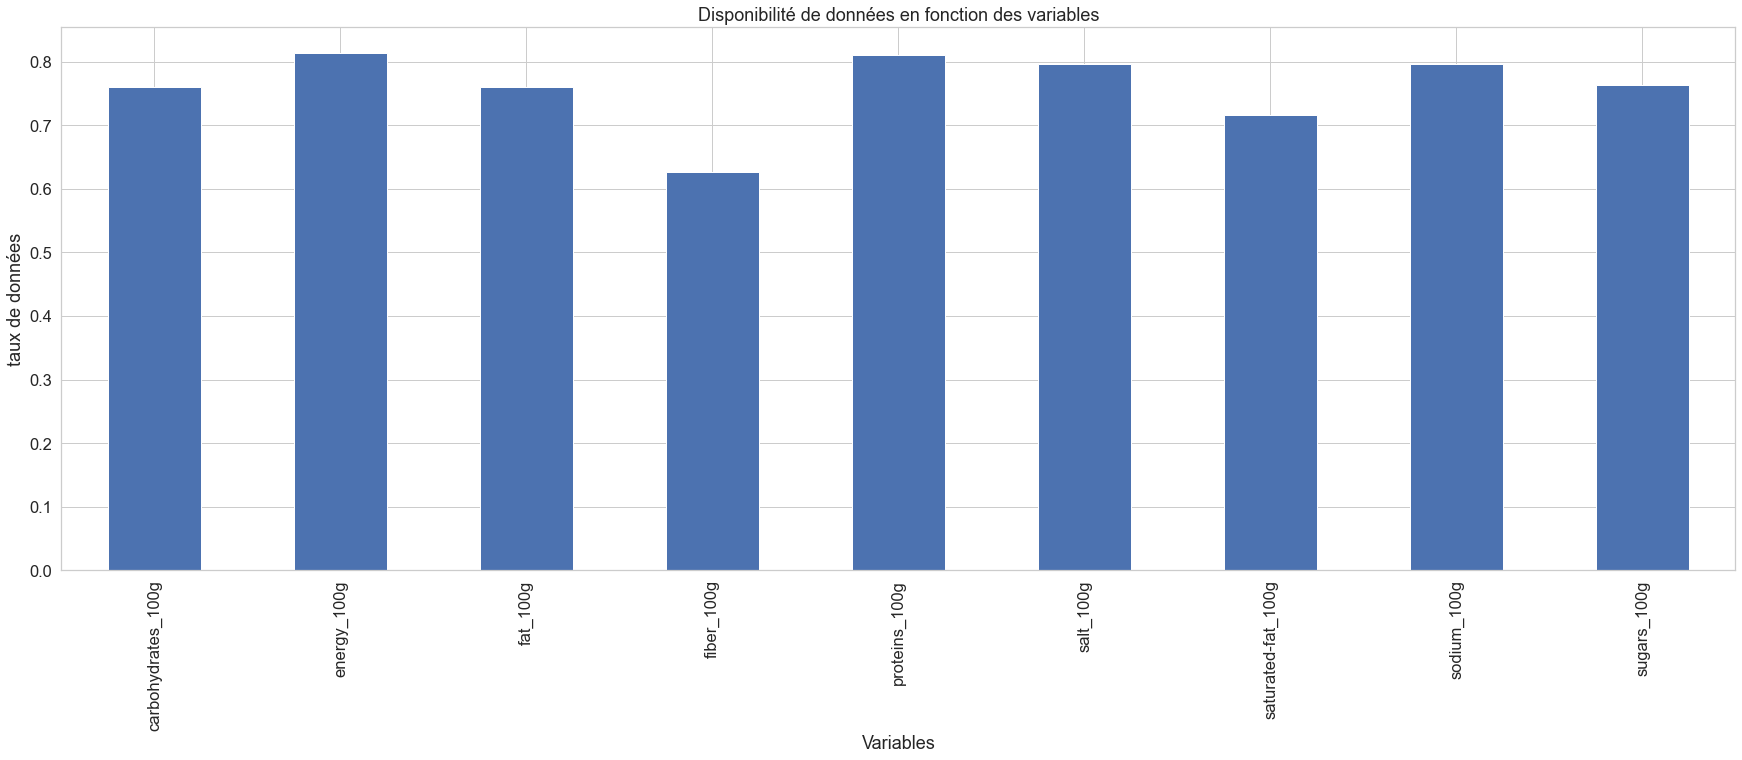

In [238]:
complitude_rate_df_final_imputer=df_final_imputer2.notnull().sum()/final_data_moyenne2.shape[0]

plt.figure(figsize=(30,10))
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.ylabel(ylabel='taux de données')
plt.xlabel(xlabel='Variables')
plt.title("Disponibilité de données en fonction des variables")
final_df_completitude2=complitude_rate_df_final_imputer.sort_index()
final_df_completitude2.plot(kind="bar")
plt.show()

In [239]:
imp = IterativeImputer()

In [240]:
# Introduce IterativeImputer with an estimator
imp = IterativeImputer()# Fit to the dataset containing missing values
imp.fit(df_final_imputer2)# Transform the dataset containing missing values
df_imputer = pd.DataFrame(imp.transform(df_final_imputer2), columns = df_final_imputer2.columns)

In [241]:
df_imputer

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669
1,2243.000000,28.5700,28.570000,64.290000,14.290000,3.600000,3.570000,0.000000,0.000000
2,1941.000000,17.8600,0.000000,60.710000,17.860000,7.100000,17.860000,0.635000,0.250000
3,2540.000000,57.1400,5.360000,17.860000,3.570000,7.100000,17.860000,1.224280,0.482000
4,1552.000000,1.4300,1.148830,77.140000,35.170236,5.700000,8.570000,2.028945,0.798797
...,...,...,...,...,...,...,...,...,...
320767,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669
320768,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
320769,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669
320770,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669


In [242]:
df_final_imputer2.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,2.611130e+05,243891.000000,229554.000000,243588.000000,244971.000000,200886.000000,259922.000000,255510.000000,255463.000000
mean,1.141915e+03,12.730379,5.129932,32.073981,16.003484,2.862111,7.075940,2.028624,0.798815
std,6.447154e+03,17.578747,8.014238,29.731719,22.327284,12.867578,8.409054,128.269454,50.504428
min,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000
25%,3.770000e+02,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000
50%,1.100000e+03,5.000000,1.790000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000
75%,1.674000e+03,20.000000,7.140000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000
max,3.251373e+06,714.290000,550.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000


In [243]:
df_imputer.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,3.207720e+05,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000
mean,1.142855e+03,12.856200,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669
std,5.817373e+03,19.064569,6.891260,34.976868,19.881705,10.672261,7.575627,114.479784,45.070780
min,0.000000e+00,-9.543870,-84.376696,-162.957668,-61.649820,-61.345246,-800.000000,0.000000,-0.000005
25%,4.990000e+02,0.880000,0.200000,9.400000,2.200000,0.000000,1.600000,0.120000,0.047244
50%,1.142855e+03,10.737726,3.330000,32.059983,10.620000,2.171025,6.940000,0.952500,0.375000
75%,1.569000e+03,16.000000,5.000000,50.000000,16.670000,3.080334,8.330000,2.028624,0.798669
max,3.251373e+06,6006.376345,550.000000,12981.349295,3520.000000,5380.000000,430.000000,64312.800000,25320.000000


In [244]:
cols = []
for i in range(len(df_imputer.columns)):
    temp =int(df_imputer[df_imputer.columns[i]].isnull().sum()/df_imputer.shape[0]*100)
    print(df_imputer.columns[i],' - ', temp, '% de cellules vides' )

energy_100g  -  0 % de cellules vides
fat_100g  -  0 % de cellules vides
saturated-fat_100g  -  0 % de cellules vides
carbohydrates_100g  -  0 % de cellules vides
sugars_100g  -  0 % de cellules vides
fiber_100g  -  0 % de cellules vides
proteins_100g  -  0 % de cellules vides
salt_100g  -  0 % de cellules vides
sodium_100g  -  0 % de cellules vides


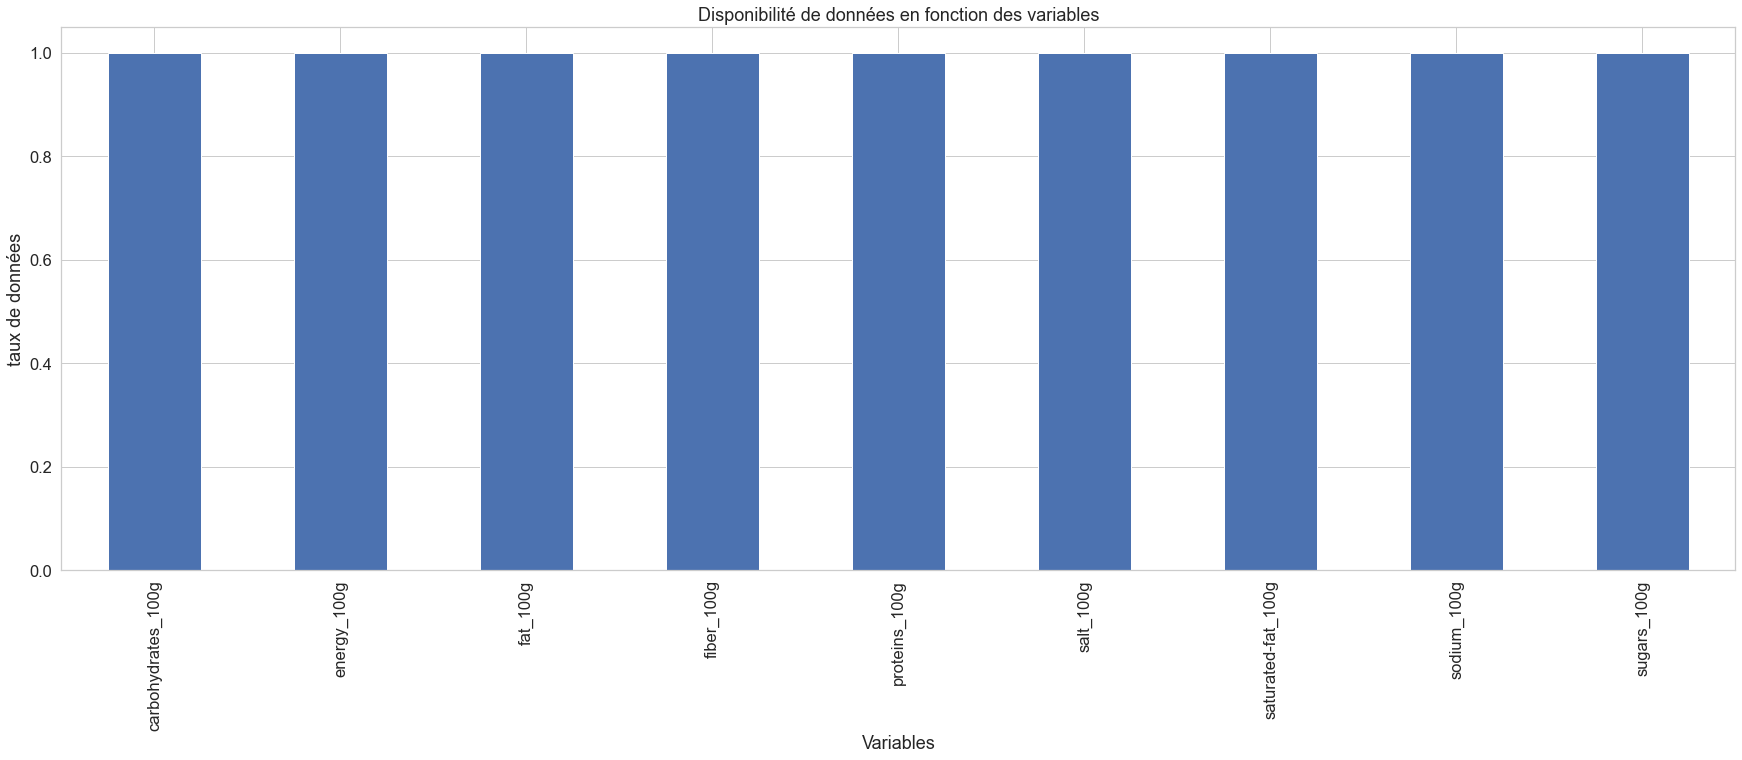

In [245]:
complitude_rate_df_final_imputer2=df_imputer.notnull().sum()/df_imputer.shape[0]

plt.figure(figsize=(30,10))
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.ylabel(ylabel='taux de données')
plt.xlabel(xlabel='Variables')
plt.title("Disponibilité de données en fonction des variables")
final_df_completitude2=complitude_rate_df_final_imputer2.sort_index()
final_df_completitude2.plot(kind="bar")
plt.show()

### Troisième Méthode KNN

In [246]:
data_final

,code,pnns_groups_2,pnns_groups_1,nutrition_grade_fr,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,3087,NaN,NaN,NaN,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,NaN,NaN,d,Banana Chips Sweetened (Whole),NaN,28.57,28.57,64.29,14.29,3.6,3.57,NaN,NaN,14.0
2,4559,NaN,NaN,b,Peanuts,NaN,17.86,NaN,60.71,17.86,7.1,17.86,0.63500,0.250,NaN
3,16087,NaN,NaN,d,Organic Salted Nut Mix,NaN,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
4,16094,NaN,NaN,NaN,Organic Polenta,NaN,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,NaN,NaN,NaN,Tomato & ricotta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,NaN,NaN,b,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320769,9970229501521,Appetizers,Salty snacks,NaN,乐吧泡菜味薯片,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,NaN,NaN,NaN,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
list_of_variable = ['nutrition-score-fr_100g']

df_final_nutri = data_final.loc[:,list_of_variable]
df_final_nutri

,nutrition-score-fr_100g
0,NaN
1,14.0
2,NaN
3,12.0
4,NaN
...,...
320767,NaN
320768,NaN
320769,NaN
320770,NaN


In [248]:
data_final_regressor = df_imputer.copy()
data_final_regressor

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669
1,2243.000000,28.5700,28.570000,64.290000,14.290000,3.600000,3.570000,0.000000,0.000000
2,1941.000000,17.8600,0.000000,60.710000,17.860000,7.100000,17.860000,0.635000,0.250000
3,2540.000000,57.1400,5.360000,17.860000,3.570000,7.100000,17.860000,1.224280,0.482000
4,1552.000000,1.4300,1.148830,77.140000,35.170236,5.700000,8.570000,2.028945,0.798797
...,...,...,...,...,...,...,...,...,...
320767,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669
320768,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
320769,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669
320770,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669


In [249]:
df_final_regressor = pd.concat([data_final_regressor, df_final_nutri], axis=1)
df_final_regressor

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,NaN
1,2243.000000,28.5700,28.570000,64.290000,14.290000,3.600000,3.570000,0.000000,0.000000,14.0
2,1941.000000,17.8600,0.000000,60.710000,17.860000,7.100000,17.860000,0.635000,0.250000,NaN
3,2540.000000,57.1400,5.360000,17.860000,3.570000,7.100000,17.860000,1.224280,0.482000,12.0
4,1552.000000,1.4300,1.148830,77.140000,35.170236,5.700000,8.570000,2.028945,0.798797,NaN
...,...,...,...,...,...,...,...,...,...,...
320767,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,NaN
320768,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
320769,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,NaN
320770,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,NaN


In [250]:
cols = []
for i in range(len(df_final_regressor.columns)):
    temp =int(df_final_regressor[df_final_regressor.columns[i]].isnull().sum()/df_final_regressor.shape[0]*100)
    print(df_final_regressor.columns[i],' - ', temp, '% de cellules vides' )

energy_100g  -  0 % de cellules vides
fat_100g  -  0 % de cellules vides
saturated-fat_100g  -  0 % de cellules vides
carbohydrates_100g  -  0 % de cellules vides
sugars_100g  -  0 % de cellules vides
fiber_100g  -  0 % de cellules vides
proteins_100g  -  0 % de cellules vides
salt_100g  -  0 % de cellules vides
sodium_100g  -  0 % de cellules vides
nutrition-score-fr_100g  -  46 % de cellules vides


### Isolement de mes deux data frame avec le nutriscore null ou non null

In [251]:
data_nutriscore_complete = df_final_regressor[(df_final_regressor["nutrition-score-fr_100g"].isna()==False)]
data_nutriscore_complete

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1,2243.0,28.570000,28.57,64.290000,14.29,3.60,3.570,0.00000,0.000000,14.0
3,2540.0,57.140000,5.36,17.860000,3.57,7.10,17.860,1.22428,0.482000,12.0
7,1833.0,18.750000,4.69,57.810000,15.62,9.40,14.060,0.13970,0.055000,7.0
12,2230.0,36.670000,5.00,36.670000,3.33,6.70,16.670,1.60782,0.633000,12.0
20,1464.0,17.500000,7.50,42.500000,32.50,5.00,7.500,0.28448,0.112000,14.0
...,...,...,...,...,...,...,...,...,...,...
320702,1031.0,1.300000,1.28,95.310000,0.10,1.47,0.004,0.00100,0.000394,2.0
320734,2155.0,16.041363,3.40,25.906996,1.80,5.60,7.800,1.35000,0.531496,9.0
320738,1393.0,9.720000,2.78,61.110000,30.56,8.30,5.560,0.95250,0.375000,11.0
320740,1084.0,23.227587,12.00,19.595358,10.50,0.00,8.700,0.29000,0.114173,16.0


In [252]:
data_nutriscore_no_complete = df_final_regressor[(df_final_regressor["nutrition-score-fr_100g"].isna()==True)]
data_nutriscore_no_complete

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,1142.855327,12.856200,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,NaN
2,1941.000000,17.860000,0.000000,60.710000,17.860000,7.100000,17.860000,0.635000,0.250000,NaN
4,1552.000000,1.430000,1.148830,77.140000,35.170236,5.700000,8.570000,2.028945,0.798797,NaN
5,1933.000000,18.270000,1.920000,63.460000,11.540000,7.700000,13.460000,2.028931,0.798792,NaN
6,1490.000000,20.941548,5.423691,80.000000,33.128047,12.717517,8.890000,2.029040,0.798834,NaN
...,...,...,...,...,...,...,...,...,...,...
320767,1142.855327,12.856200,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,NaN
320768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
320769,1142.855327,12.856200,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,NaN
320770,1142.855327,12.856200,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,NaN


In [253]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(data_nutriscore_complete, test_size = 0.3)

In [254]:
x_train = train.drop('nutrition-score-fr_100g', axis=1)
y_train = train['nutrition-score-fr_100g']

In [255]:
x_test = test.drop('nutrition-score-fr_100g', axis = 1)
y_test = test['nutrition-score-fr_100g']

In [256]:
x_train.columns

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g'],
      dtype='object')

In [257]:
y_train

271839    13.0
146032    10.0
173629    28.0
264874    25.0
262445     1.0
          ... 
146400    15.0
275412    22.0
121309    10.0
111326     1.0
177401     4.0
Name: nutrition-score-fr_100g, Length: 120918, dtype: float64

In [258]:
x_test

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
24084,979.0,17.02,6.38,6.38,2.13,-0.283899,14.89,5.45846,2.149
81575,1569.0,12.50,9.38,62.50,53.12,3.100000,3.12,0.15748,0.062
143682,837.0,100.00,0.00,0.00,0.00,0.000000,0.00,4.82600,1.900
56976,1151.0,18.68,12.09,16.48,14.29,-1.997085,7.69,0.89408,0.352
61522,2197.0,37.50,10.00,42.50,27.50,7.500000,15.00,0.69850,0.275
...,...,...,...,...,...,...,...,...,...
170129,2389.0,46.43,8.93,32.14,7.14,3.600000,17.86,1.04394,0.411
7583,803.0,19.23,11.54,7.69,3.85,0.000000,3.85,0.14732,0.058
59607,971.0,1.79,0.00,46.43,1.79,1.800000,8.93,1.40716,0.554
24263,1674.0,36.67,31.67,13.33,3.33,6.700000,3.33,0.04318,0.017


### On va mettre toute les variables sur une même échelle entre 0 & 1

In [259]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [260]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [261]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120918 entries, 0 to 120917
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       120918 non-null  float64
 1   1       120918 non-null  float64
 2   2       120918 non-null  float64
 3   3       120918 non-null  float64
 4   4       120918 non-null  float64
 5   5       120918 non-null  float64
 6   6       120918 non-null  float64
 7   7       120918 non-null  float64
 8   8       120918 non-null  float64
dtypes: float64(9)
memory usage: 8.3 MB


In [262]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51823 entries, 0 to 51822
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       51823 non-null  float64
 1   1       51823 non-null  float64
 2   2       51823 non-null  float64
 3   3       51823 non-null  float64
 4   4       51823 non-null  float64
 5   5       51823 non-null  float64
 6   6       51823 non-null  float64
 7   7       51823 non-null  float64
 8   8       51823 non-null  float64
dtypes: float64(9)
memory usage: 3.6 MB


### On va maintenant chercher le meilleur nombre des voisins pour nos KNN

In [263]:
#Importation des packages réquis

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

### rmse_val = une erreur moyenne entre la valeur prédite et celle observée 

In [264]:
rmse_val = [] #to store rmse values for different k

for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.2867743345255
RMSE value for k=  2 is: 8.333446281129994
RMSE value for k=  3 is: 8.404772229124955
RMSE value for k=  4 is: 8.56644141861855
RMSE value for k=  5 is: 8.475806149894481
RMSE value for k=  6 is: 8.325966036289756
RMSE value for k=  7 is: 8.116551771906169
RMSE value for k=  8 is: 8.0228684712054
RMSE value for k=  9 is: 7.903128851833681
RMSE value for k=  10 is: 7.824430654597105
RMSE value for k=  11 is: 7.75550890036296
RMSE value for k=  12 is: 7.7166614181412445
RMSE value for k=  13 is: 7.68095388299438
RMSE value for k=  14 is: 7.629904463559862
RMSE value for k=  15 is: 7.5994978976481855
RMSE value for k=  16 is: 7.559940200481812
RMSE value for k=  17 is: 7.532626615626854
RMSE value for k=  18 is: 7.505435159151274
RMSE value for k=  19 is: 7.4770118858461325
RMSE value for k=  20 is: 7.458671955100942
RMSE value for k=  21 is: 7.44676386538475
RMSE value for k=  22 is: 7.429535005783898
RMSE value for k=  23 is: 7.40843607293624
RMS

<AxesSubplot:>

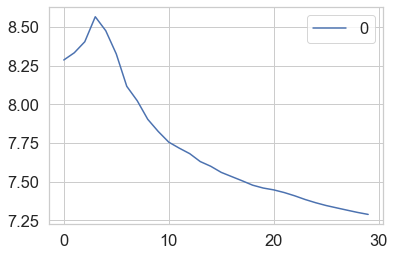

In [265]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [266]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1, 31))}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 5}

Nous avons choisi de continuer avec le K = 27 à la suite de cette étude et donc nous avons refait notre prédiction en fonction 

In [267]:
model = neighbors.KNeighborsRegressor(n_neighbors = 4)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test)
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values
print('RMSE value for k= ' , 4 , 'is:', error)

RMSE value for k=  4 is: 8.56644141861855


### REMPLACEMENT DU NUTRISCORE

In [268]:
x_impute = data_nutriscore_no_complete.drop('nutrition-score-fr_100g', axis=1)

x_impute_scaled = scaler.fit_transform(x_impute)


In [269]:
pred_impute_nutriscore = model.predict(x_impute_scaled)


In [270]:
set(pred_impute_nutriscore)

{13.0, 13.25, 16.0, 16.25, 16.75, 17.25, 21.5, 24.0}

In [271]:
df_final_regressor.loc[df_final_regressor['nutrition-score-fr_100g'].isnull(), 'nutrition-score-fr_100g']

0        NaN
2        NaN
4        NaN
5        NaN
6        NaN
          ..
320767   NaN
320768   NaN
320769   NaN
320770   NaN
320771   NaN
Name: nutrition-score-fr_100g, Length: 148031, dtype: float64

In [272]:
len(pred_impute_nutriscore)

148031

In [273]:
df_final_regressor.loc[df_final_regressor['nutrition-score-fr_100g'].isnull(), 'nutrition-score-fr_100g'] = pred_impute_nutriscore

In [274]:
df_final_regressor

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.0
1,2243.000000,28.5700,28.570000,64.290000,14.290000,3.600000,3.570000,0.000000,0.000000,14.0
2,1941.000000,17.8600,0.000000,60.710000,17.860000,7.100000,17.860000,0.635000,0.250000,13.0
3,2540.000000,57.1400,5.360000,17.860000,3.570000,7.100000,17.860000,1.224280,0.482000,12.0
4,1552.000000,1.4300,1.148830,77.140000,35.170236,5.700000,8.570000,2.028945,0.798797,16.0
...,...,...,...,...,...,...,...,...,...,...
320767,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.0
320768,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.0
320769,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.0
320770,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.0


In [275]:
cols = []
for i in range(len(df_final_regressor.columns)):
    temp =int(df_final_regressor[df_final_regressor.columns[i]].isnull().sum()/df_final_regressor.shape[0]*100)
    print(df_final_regressor.columns[i],' - ', temp, '% de cellules vides' )

energy_100g  -  0 % de cellules vides
fat_100g  -  0 % de cellules vides
saturated-fat_100g  -  0 % de cellules vides
carbohydrates_100g  -  0 % de cellules vides
sugars_100g  -  0 % de cellules vides
fiber_100g  -  0 % de cellules vides
proteins_100g  -  0 % de cellules vides
salt_100g  -  0 % de cellules vides
sodium_100g  -  0 % de cellules vides
nutrition-score-fr_100g  -  0 % de cellules vides


### Imputation du nutriscore grade

In [276]:
data_final

,code,pnns_groups_2,pnns_groups_1,nutrition_grade_fr,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,3087,NaN,NaN,NaN,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,NaN,NaN,d,Banana Chips Sweetened (Whole),NaN,28.57,28.57,64.29,14.29,3.6,3.57,NaN,NaN,14.0
2,4559,NaN,NaN,b,Peanuts,NaN,17.86,NaN,60.71,17.86,7.1,17.86,0.63500,0.250,NaN
3,16087,NaN,NaN,d,Organic Salted Nut Mix,NaN,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
4,16094,NaN,NaN,NaN,Organic Polenta,NaN,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,NaN,NaN,NaN,Tomato & ricotta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,NaN,NaN,b,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320769,9970229501521,Appetizers,Salty snacks,NaN,乐吧泡菜味薯片,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,NaN,NaN,NaN,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
df_final_regressor['nutrition_grade_fr'] = data_final['nutrition_grade_fr'].values

In [278]:
df_final_regressor.loc[df_final_regressor["nutrition_grade_fr"].isnull()].describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,99562.000000,99562.000000,99562.000000,99562.000000,99562.000000,99562.000000,99562.000000,99562.000000,99562.000000,99562.000000
mean,1024.113166,11.498141,4.477275,29.754612,16.566763,1.453392,5.529899,2.890570,1.138014,13.723795
std,747.926663,14.782505,4.752318,22.775492,16.612143,5.199409,5.908571,17.438861,6.865672,1.288401
min,0.000000,-7.332943,-84.376696,-11.441436,-61.649820,-61.345246,-800.000000,0.000000,-0.000005,13.000000
25%,895.000000,0.000000,2.532828,16.220000,12.000000,0.700000,0.000000,1.239520,0.488000,13.000000
50%,1142.855327,12.856200,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.000000
75%,1142.855327,12.856200,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.000000
max,94140.000000,296.808525,175.380000,2916.670000,266.021446,250.000000,100.000000,3556.000000,1400.000000,24.000000


In [279]:
data_final.groupby("nutrition_grade_fr")["nutrition-score-fr_100g"].describe()

,count,mean,std,min,25%,50%,75%,max
nutrition_grade_fr,,,,,,,,
a,17.0,4.882353,5.266431,1.0,1.0,3.0,6.0,17.0
b,21393.0,1.473613,0.499315,1.0,1.0,1.0,2.0,2.0
c,45538.0,6.367561,2.517749,2.0,4.0,6.0,9.0,10.0
d,62763.0,14.066934,2.312273,6.0,12.0,14.0,16.0,18.0
e,43030.0,21.962305,3.224900,10.0,20.0,22.0,24.0,40.0


In [280]:
df_final_regressor.groupby("nutrition_grade_fr")["nutrition-score-fr_100g"].describe()

,count,mean,std,min,25%,50%,75%,max
nutrition_grade_fr,,,,,,,,
a,35634.0,15.428860,1.201153,1.0,16.0,16.0,16.0,17.00
b,34245.0,6.631851,6.715493,1.0,1.0,2.0,16.0,16.75
c,45538.0,6.367561,2.517749,2.0,4.0,6.0,9.0,10.00
d,62763.0,14.066934,2.312273,6.0,12.0,14.0,16.0,18.00
e,43030.0,21.962305,3.224900,10.0,20.0,22.0,24.0,40.00


In [281]:
df_final_regressor.head(4)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.0,NaN
1,2243.000000,28.5700,28.570000,64.290000,14.290000,3.600000,3.570000,0.000000,0.000000,14.0,d
2,1941.000000,17.8600,0.000000,60.710000,17.860000,7.100000,17.860000,0.635000,0.250000,13.0,b
3,2540.000000,57.1400,5.360000,17.860000,3.570000,7.100000,17.860000,1.224280,0.482000,12.0,d


In [282]:
def compute_nutriscore_grade_fr(nutriscore_value):
    if nutriscore_value <= -1:
        return "a"
    elif nutriscore_value > -1 and nutriscore_value <= 3:
        return "b"
    elif nutriscore_value > 3 and nutriscore_value <= 11:
        return "c"
    elif nutriscore_value > 11 and nutriscore_value <= 18:
        return "d"
    else:
        return "e"

print(compute_nutriscore_grade_fr(5)) # will output "C"

c


In [283]:
df_final_regressor.loc[df_final_regressor['nutrition_grade_fr'].isnull(), 'nutrition_grade_fr']=df_final_regressor.loc[df_final_regressor['nutrition_grade_fr'].isnull()]['nutrition-score-fr_100g'].apply(compute_nutriscore_grade_fr)

In [284]:
df_final_regressor

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.0,d
1,2243.000000,28.5700,28.570000,64.290000,14.290000,3.600000,3.570000,0.000000,0.000000,14.0,d
2,1941.000000,17.8600,0.000000,60.710000,17.860000,7.100000,17.860000,0.635000,0.250000,13.0,b
3,2540.000000,57.1400,5.360000,17.860000,3.570000,7.100000,17.860000,1.224280,0.482000,12.0,d
4,1552.000000,1.4300,1.148830,77.140000,35.170236,5.700000,8.570000,2.028945,0.798797,16.0,d
...,...,...,...,...,...,...,...,...,...,...,...
320767,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.0,d
320768,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.0,b
320769,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.0,d
320770,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.0,d


### Export du fichier nettoyé 

In [285]:
df_final_regressor.to_csv('en.openfoodfacts.org.products_cleaned.csv', index=False)